In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Step 1
Import CBSA data, and select the values with populations greater than 1 million

In [2]:
#Import CBSA data
pop_by_CBSA = pd.read_csv("raw_data/Pop_by_CBSA.csv")
pop_by_CBSA

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under ...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!5 to 9...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!10 to ...,Margin of Error!!Total!!Total population!!AGE!...,...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...
1,310M500US10140,"Aberdeen, WA Micro Area",75061,*****,3852,669,3260,838,5005,765,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,310M500US10180,"Abilene, TX Metro Area",171795,2878,11570,484,9896,1458,12450,1361,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,310M500US10300,"Adrian, MI Micro Area",98451,*****,5374,347,5210,820,6216,725,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,310M500US10380,"Aguadilla-Isabela, PR Metro Area",288877,3236,10632,1102,14094,1982,14752,2067,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,310M500US49620,"York-Hanover, PA Metro Area",449058,*****,25154,280,25969,2239,29900,2152,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
515,310M500US49660,"Youngstown-Warren-Boardman, OH-PA Metro Area",536081,*****,28283,566,28815,1935,30180,1992,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
516,310M500US49700,"Yuba City, CA Metro Area",175639,*****,12941,678,15423,1531,11442,1483,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
517,310M500US49740,"Yuma, AZ Metro Area",213787,*****,15099,369,14298,2379,15550,2419,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [3]:
#Clean CBSA data
pop_by_CBSA = pop_by_CBSA[["GEO_ID", "NAME", "S0101_C01_001E", "S0101_C01_030E"]]
pop_by_CBSA = pop_by_CBSA.iloc[1:, :]
pop_by_CBSA.set_axis(["CBSA id", "CBSA Name", "Total Population", "Population Age >= 65"], axis = 1, inplace=True)
pop_by_CBSA["CBSA id"] = pop_by_CBSA["CBSA id"].apply(lambda ID: ID[-5:])
pop_by_CBSA["Total Population"] = pop_by_CBSA["Total Population"].apply(int)
pop_by_CBSA.sort_values("Total Population", axis = 0, ascending = False, inplace = True)
pop_by_CBSA.reset_index(drop=True, inplace=True)
pop_by_CBSA = pop_by_CBSA.astype({"Total Population":"int32", "Population Age >= 65": "int32"})
pop_by_CBSA

,CBSA id,CBSA Name,Total Population,Population Age >= 65
0,35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",19216182,3114746
1,31080,"Los Angeles-Long Beach-Anaheim, CA Metro Area",13214799,1899051
2,16980,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",9457867,1424540
3,19100,"Dallas-Fort Worth-Arlington, TX Metro Area",7573136,872765
4,26420,"Houston-The Woodlands-Sugar Land, TX Metro Area",7066140,815422
...,...,...,...,...
513,32300,"Martinsville, VA Micro Area",62934,15133
514,26740,"Hutchinson, KS Micro Area",61998,13016
515,21420,"Enid, OK Metro Area",61056,9752
516,47460,"Walla Walla, WA Metro Area",60760,11012


In [4]:
#Select CBSA data
CBSA_data = pop_by_CBSA[pop_by_CBSA["Total Population"] >= 1e6]
CBSA_data["CBSA Name"] = CBSA_data["CBSA Name"].apply(lambda name: name[:name.find(" Metro")])
CBSA_data.head(10)

/tmp/ipykernel_415395/2517528970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CBSA_data["CBSA Name"] = CBSA_data["CBSA Name"].apply(lambda name: name[:name.find(" Metro")])


,CBSA id,CBSA Name,Total Population,Population Age >= 65
0,35620,"New York-Newark-Jersey City, NY-NJ-PA",19216182,3114746
1,31080,"Los Angeles-Long Beach-Anaheim, CA",13214799,1899051
2,16980,"Chicago-Naperville-Elgin, IL-IN-WI",9457867,1424540
3,19100,"Dallas-Fort Worth-Arlington, TX",7573136,872765
4,26420,"Houston-The Woodlands-Sugar Land, TX",7066140,815422
5,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",6280697,846785
6,33100,"Miami-Fort Lauderdale-Pompano Beach, FL",6166488,1151212
7,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",6102434,1000208
8,12060,"Atlanta-Sandy Springs-Alpharetta, GA",6018744,763114
9,38060,"Phoenix-Mesa-Chandler, AZ",4948203,792133


# Step 2
Determine the population of Fee-for-Service (FFS) Medicare beneficiaries in each MSA. 

This data comes from the Kaiser Family Foundation (KFF), and lists the proportion of Medicare Advantage beneficiaries per Metropolitan Statistical Area. As a patient is either Fee-for-Service **OR** Medicare Advantage, the proportion of FFS patients is simply (1 - *proportion of Medicare Advantage*)

In [5]:
#Read and clean the KFF data
KFF_data = pd.read_csv("raw_data/KFF_Medicare_Data.csv", sep=',')
KFF_data.dropna(inplace=True)
KFF_data.columns = KFF_data.loc[1]
KFF_data = KFF_data.iloc[2:, :]
KFF_data.rename(columns={"Overall": "Proportion on Medicare Advantage"}, inplace=True)
KFF_data = KFF_data.astype({"Proportion on Medicare Advantage":"float"})

KFF_data.head(10)

1,Location,Proportion on Medicare Advantage
3,Akron,0.4608
4,Albany-Schenectady-Troy,0.4367
5,Albuquerque,0.4892
6,Allentown-Bethlehem-Easton,0.2821
7,Atlanta-Sandy Springs-Marietta,0.3847
8,Augusta-Richmond County,0.3184
9,Austin-Round Rock-San Marcos,0.3071
10,Bakersfield-Delano,0.3640
11,Baltimore-Towson,0.1227
12,Baton Rouge,0.4807


In [6]:
#Merge the CBSA data and the KFF data
#Unfortunately, the KFF data labels the CBSAs differently and does not include id codes.
#Thus, the merging will be largely manual.
#https://towardsdatascience.com/joining-dataframes-by-substring-match-with-python-pandas-8fcde5b03933
CBSA_data["join"] = 1
KFF_data["join"] = 1
combined = CBSA_data.merge(KFF_data, on="join").drop("join", axis=1)
def partial_match(row):
    for name in row["Location"].split('-'):
        if name == '': continue
        elif name in row["CBSA Name"]:
            return True
    return False

combined["matched"] = combined.apply(partial_match, axis = 1)
combined = combined[combined["matched"]].reset_index(drop=True)

#Manually removing duplicates
combined.drop([4,6,16,24,29,44,53,55], inplace=True)
combined.reset_index(drop=True, inplace=True)

CBSA_data = combined.drop(columns=["Location", "matched"])
CBSA_data

/tmp/ipykernel_415395/2495341363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CBSA_data["join"] = 1


,CBSA id,CBSA Name,Total Population,Population Age >= 65,Proportion on Medicare Advantage
0,35620,"New York-Newark-Jersey City, NY-NJ-PA",19216182,3114746,0.3075
1,31080,"Los Angeles-Long Beach-Anaheim, CA",13214799,1899051,0.4542
2,16980,"Chicago-Naperville-Elgin, IL-IN-WI",9457867,1424540,0.2099
3,19100,"Dallas-Fort Worth-Arlington, TX",7573136,872765,0.3536
4,26420,"Houston-The Woodlands-Sugar Land, TX",7066140,815422,0.4148
5,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",6280697,846785,0.1375
6,33100,"Miami-Fort Lauderdale-Pompano Beach, FL",6166488,1151212,0.5423
7,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",6102434,1000208,0.2861
8,12060,"Atlanta-Sandy Springs-Alpharetta, GA",6018744,763114,0.3847
9,38060,"Phoenix-Mesa-Chandler, AZ",4948203,792133,0.4121


In [7]:
#Finding FFS population
CBSA_data["FFS Population"] = CBSA_data.apply(lambda row: round(row["Population Age >= 65"] * (1 - row["Proportion on Medicare Advantage"])), axis =1)
CBSA_data["Medicare Advantage Population"] = CBSA_data["Population Age >= 65"] - CBSA_data["FFS Population"]
CBSA_data.head(10)

,CBSA id,CBSA Name,Total Population,Population Age >= 65,Proportion on Medicare Advantage,FFS Population,Medicare Advantage Population
0,35620,"New York-Newark-Jersey City, NY-NJ-PA",19216182,3114746,0.3075,2156962,957784
1,31080,"Los Angeles-Long Beach-Anaheim, CA",13214799,1899051,0.4542,1036502,862549
2,16980,"Chicago-Naperville-Elgin, IL-IN-WI",9457867,1424540,0.2099,1125529,299011
3,19100,"Dallas-Fort Worth-Arlington, TX",7573136,872765,0.3536,564155,308610
4,26420,"Houston-The Woodlands-Sugar Land, TX",7066140,815422,0.4148,477185,338237
5,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",6280697,846785,0.1375,730352,116433
6,33100,"Miami-Fort Lauderdale-Pompano Beach, FL",6166488,1151212,0.5423,526910,624302
7,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",6102434,1000208,0.2861,714048,286160
8,12060,"Atlanta-Sandy Springs-Alpharetta, GA",6018744,763114,0.3847,469544,293570
9,38060,"Phoenix-Mesa-Chandler, AZ",4948203,792133,0.4121,465695,326438


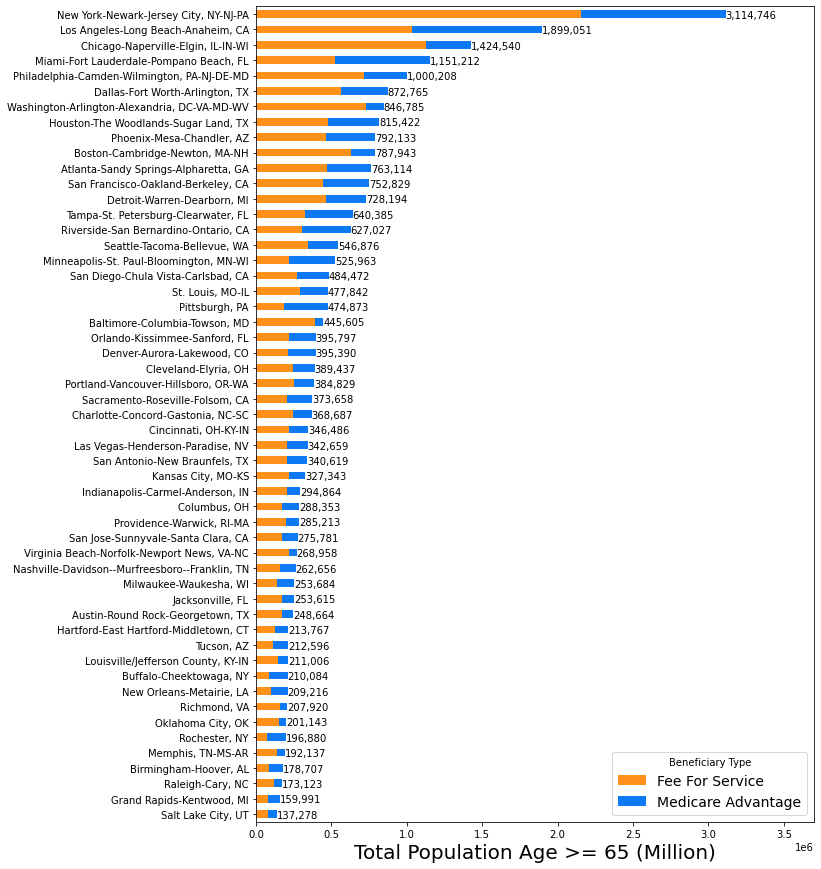

In [8]:
#Create base graph
plt.rcParams["figure.figsize"]=[10, 15]
CBSA_data = CBSA_data.sort_values("Population Age >= 65").reset_index(drop=True)
CBSA_data[["CBSA Name", "FFS Population", "Medicare Advantage Population"]].plot.barh(stacked=True, color=["#FF901A", "#0D79F3"])
plt.yticks(ticks=CBSA_data.index, labels=CBSA_data["CBSA Name"], rotation="horizontal")
#Create data labels on bars for total population
for idx in CBSA_data.index:
    label_xloc = CBSA_data.loc[idx, "Population Age >= 65"]
    plt.text(label_xloc, idx-0.25, "{:,}".format(label_xloc))
#Extend graph to fit labels
plt.xlim(0, 3.7e6)

plt.xlabel("Total Population Age >= 65 (Million)", fontsize=20)
plt.legend(["Fee For Service", "Medicare Advantage"], title="Beneficiary Type", loc="lower right", fontsize=14)
plt.savefig("Images/CBSA/FFS_Pop_by_MSA.png", facecolor="white", bbox_inches="tight", pad_inches=1)
plt.show()


# Step 3
Import the Medical claims data
*One change was made manually to this raw data: Physician 1134369002 **(Parrack, Kevin M)** moved in 2019 from **New York, NY** to the practice in **Wesley Chapel, FL**. As he performed the third-most parathyroidectomies in 2019, this impacts the data significantly. We manually changed his location to reflect this.*

In [9]:
claims_data = pd.read_csv("raw_data/Physician_Data.csv")
claims_data["Physician Name"] = claims_data.apply(lambda row: row["Rndrng_Prvdr_Last_Org_Name"]+', '+row["Rndrng_Prvdr_First_Name"]+' '+str(row["Rndrng_Prvdr_MI"]) if row["Rndrng_Prvdr_MI"] != np.NaN else ''+', '+str(row["Rndrng_Prvdr_Crdntls"]), axis=1)
claims_data["Address of Practice"] = claims_data["Rndrng_Prvdr_St1"]+' '+claims_data["Rndrng_Prvdr_City"]+', '+claims_data["Rndrng_Prvdr_State_Abrvtn"]
claims_data = claims_data.rename(columns={"Rndrng_NPI": "NPI", "Rndrng_Prvdr_Gndr":"Physician Gender", "Rndrng_Prvdr_Zip5":"ZIP-5", "Rndrng_Prvdr_CBSA_Code":"CBSA Code", "Rndrng_Prvdr_CBSA_Name":"CBSA Name", "Tot_PTX":"Total PTX", "Rndrng_Prvdr_Fips":"FIPS-12"})
claims_data = claims_data.filter(["NPI", "Physician Name", "Physician Gender", "Address of Practice", "ZIP-5", "FIPS-12", "Total PTX"])
claims_data.to_csv("processed_data/Simplified_Physician_Data.csv")
claims_data

,NPI,Physician Name,Physician Gender,Address of Practice,ZIP-5,Total PTX
0,1194746966,"Politz, Douglas E",M,"2400 Cypress Glen Dr. Wesley Chapel, FL",33613,448
1,1033166277,"Mitchell, Jamie C",M,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,435
2,1134369002,"Parrack, Kevin M",M,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,419
3,1255640124,"Boone, Deva nan",F,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,403
4,1285711275,"Ruan, Daniel T",M,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,357
...,...,...,...,...,...,...
440,1982851176,"Albert, Scott P",M,"750 E Adams St Syracuse, NY",13210,11
441,1477782100,"Dhir, Mashaal nan",M,"750 E Adams St Syracuse, NY",13210,11
442,1609096775,"Dickson, Paxton V",M,"7945 Wolf River Blvd Germantown, TN",38138,11
443,1710112214,"Wachtel, Heather nan",F,"3400 Spruce St Philadelphia, PA",19104,11


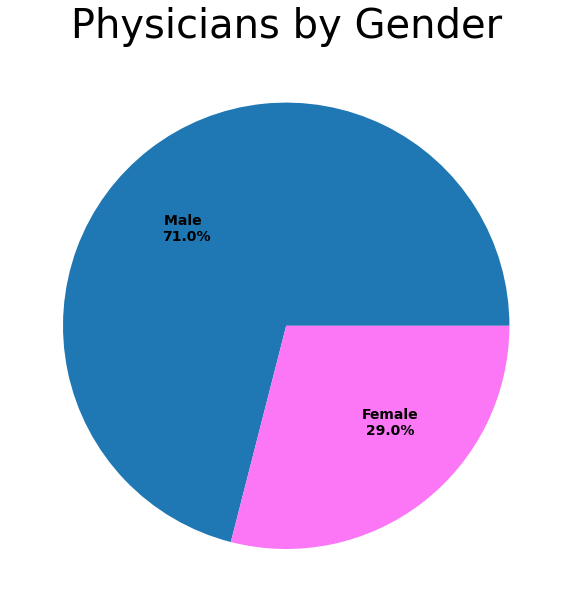

In [10]:
#Pie chart of Physicians by Gender
male_count = len(claims_data[claims_data["Physician Gender"] == 'M'])
female_count = len(claims_data[claims_data["Physician Gender"] == 'F'])
total=len(claims_data)

plt.pie([male_count, female_count], 
        colors=["#1f77b4", "#fb77f6"],
        labels = ["Male  \n{:.1%}".format(male_count/total), "Female\n {:.1%}".format(female_count/total)],
        labeldistance=0.55,
        textprops={"fontsize":14, "fontweight":"bold"})
plt.title("Physicians by Gender", fontsize=40)
plt.savefig("Images/CBSA/Physicians_by_Gender.png", facecolor='white')
plt.show()

In [11]:

### MOVED TO ANALYTIC PORTION ###


# #Graph of Lorenz curve of Physician care per population percentage
# #https://zhiyzuo.github.io/Plot-Lorenz/
# plt.rcParams["figure.figsize"]=[10,10]
# lorenz_data = claims_data[["Total PTX"]]
# lorenz_data.loc[-1] = 0
# lorenz_data = lorenz_data.sort_values("Total PTX").reset_index(drop=True)
# lorenz_data["Total PTX"] = lorenz_data["Total PTX"].cumsum() / lorenz_data["Total PTX"].sum()
# lorenz_data["Total HVS"] = lorenz_data.index / (len(lorenz_data) - 1)

# area_under_curve = np.trapz(lorenz_data["Total PTX"]) / len(lorenz_data)
# gini_score = area_under_curve / 0.5

# plt.plot("Total HVS", "Total PTX",data=lorenz_data, linewidth=5)
# plt.plot(lorenz_data["Total HVS"], lorenz_data["Total HVS"], linewidth=5, alpha=0.35)
# plt.grid()
# plt.text(0.6, 0.55, f"Gini Score: {round(gini_score, 2)}", fontweight="bold", fontsize=12)


# plt.xlabel("Proportion of High-Volume Parathyroid Surgeons", fontsize=14)
# plt.ylabel("Proportion of Patient Population", fontsize=14)
# plt.xticks(np.array(range(11))/10)
# plt.yticks(np.array(range(11))/10)

# plt.savefig("Images/CBSA/Gini_Score_Physicians.png", facecolor='white')
# plt.show()

# Step 5
Group medical claims data by CBSA

In [12]:
#Read in Zip to CBSA crosswalk
zip_to_CBSA = pd.read_csv("raw_data/Crosswalk/zip_cbsa.csv", dtype={"zip":"string", "cbsa":"string"})
zip_to_CBSA = zip_to_CBSA.filter(["zip", "cbsa"])
zip_to_CBSA.head(10)
zip_to_CBSA

,zip,cbsa
0,00683,41900
1,00683,32420
2,00923,41980
3,01010,44140
4,01010,49340
...,...,...
47479,60684,16980
47480,33945,15980
47481,78144,99999
47482,12257,10580


In [13]:
#Merge dataframes to find each Physician's CBSA
claims_data["ZIP-5"] = claims_data["ZIP-5"].apply(lambda val: str(val).zfill(5))
zip_to_CBSA["zip"] = zip_to_CBSA["zip"].apply(lambda val: val.zfill(5))
claims_data = claims_data.merge(zip_to_CBSA, left_on="ZIP-5", right_on="zip")
claims_data.drop("zip", axis = 1, inplace=True)
claims_data.rename(columns={"cbsa": "CBSA"}, inplace = True)
claims_data.head(10)

,NPI,Physician Name,Physician Gender,Address of Practice,ZIP-5,Total PTX,CBSA
0,1194746966,"Politz, Douglas E",M,"2400 Cypress Glen Dr. Wesley Chapel, FL",33613,448,45300
1,1033166277,"Mitchell, Jamie C",M,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,435,45300
2,1134369002,"Parrack, Kevin M",M,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,419,45300
3,1255640124,"Boone, Deva nan",F,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,403,45300
4,1285711275,"Ruan, Daniel T",M,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,357,45300
5,1396854329,"Lopez, Jose A",M,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,323,45300
6,1164604005,"Carling, Tobias J",M,"2400 Cypress Glen Dr Wesley Chapel, FL",33544,43,45300
7,1972757458,"Roy, Rashmi nan",F,"2352 Creel Ln Wesley Chapel, FL",33544,14,45300
8,1326092370,"Connally, Tom S",M,"500 East Robinson Norman, OK",73071,119,36420
9,1083641377,"Fraker, Douglas L",M,"3400 Spruce St Philadelphia, PA",19104,109,37980


In [14]:
#Group by CBSA and merge with CBSA_data
temp = claims_data.groupby("CBSA").agg({"NPI":'count', "Total PTX":'sum'}).reset_index()
CBSA_data = CBSA_data.merge(temp, how="left", left_on="CBSA id", right_on="CBSA")
del temp
CBSA_data.drop(columns="CBSA", inplace=True)
CBSA_data = CBSA_data.rename(columns={"NPI": "Total HVS"})
CBSA_data.fillna(0, inplace=True)
CBSA_data= CBSA_data.astype({"Total HVS":"int32", "Total PTX":"int32"})

CBSA_data

,CBSA id,CBSA Name,Total Population,Population Age >= 65,Proportion on Medicare Advantage,FFS Population,Medicare Advantage Population,Total HVS,Total PTX
0,41620,"Salt Lake City, UT",1232696,137278,0.4096,81049,56229,4,82
1,24340,"Grand Rapids-Kentwood, MI",1077370,159991,0.5072,78844,81147,2,32
2,39580,"Raleigh-Cary, NC",1390785,173123,0.3252,116823,56300,2,76
3,13820,"Birmingham-Hoover, AL",1090435,178707,0.4981,89693,89014,4,90
4,32820,"Memphis, TN-MS-AR",1344910,192137,0.2716,139953,52184,5,97
5,40380,"Rochester, NY",1069644,196880,0.6262,73594,123286,1,45
6,36420,"Oklahoma City, OK",1408950,201143,0.2312,154639,46504,1,119
7,40060,"Richmond, VA",1290866,207920,0.2226,161637,46283,1,24
8,35380,"New Orleans-Metairie, LA",1270530,209216,0.5376,96741,112475,2,26
9,15380,"Buffalo-Cheektowaga, NY",1127983,210084,0.5936,85378,124706,0,0


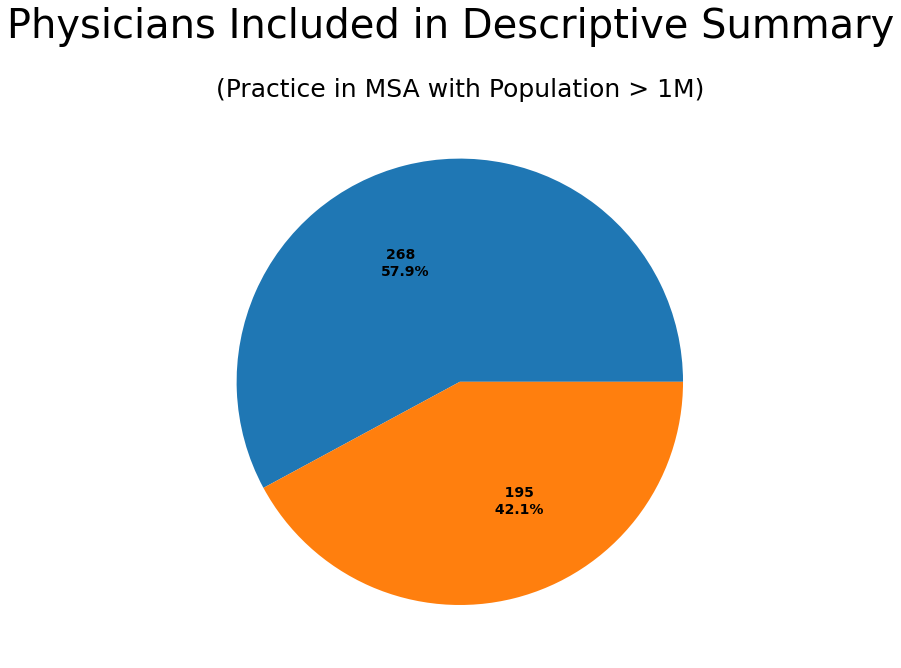

In [15]:
#Pie chart of Physicians Living in Metropolitan Areas with >1M residents (Included in analysis)
included = sum(CBSA_data["Total HVS"])
total=len(claims_data)
not_included = total - included

plt.pie([included, not_included], 
        labels = ["{}   \n{:.1%}".format(included, included/total), "   {}\n {:.1%}".format(not_included, not_included/total)],
        labeldistance=0.55,
        textprops={"fontsize":14, "fontweight":"bold"})
plt.title("(Practice in MSA with Population > 1M)", fontsize=25, y=1)
plt.suptitle("Physicians Included in Descriptive Summary", fontsize=40, y=0.85)
plt.savefig("Images/CBSA/Physicians_Included.png", facecolor='white', bbox_inches="tight", pad_inches=1)
plt.show()
#FIXME different than excel?

# Step 6
Explore claims data by CBSA

In [16]:
#Coalesce Data
CBSA_data["HVS per 100k FFS"] = CBSA_data["Total HVS"] / CBSA_data["FFS Population"] * 1e5
CBSA_data["PTX per 100k FFS"] = CBSA_data["Total PTX"] / CBSA_data["FFS Population"] * 1e5
CBSA_data

,CBSA id,CBSA Name,Total Population,Population Age >= 65,Proportion on Medicare Advantage,FFS Population,Medicare Advantage Population,Total HVS,Total PTX,HVS per 100k FFS,PTX per 100k FFS
0,41620,"Salt Lake City, UT",1232696,137278,0.4096,81049,56229,4,82,4.935286,101.173364
1,24340,"Grand Rapids-Kentwood, MI",1077370,159991,0.5072,78844,81147,2,32,2.536655,40.586475
2,39580,"Raleigh-Cary, NC",1390785,173123,0.3252,116823,56300,2,76,1.711992,65.055683
3,13820,"Birmingham-Hoover, AL",1090435,178707,0.4981,89693,89014,4,90,4.459657,100.342279
4,32820,"Memphis, TN-MS-AR",1344910,192137,0.2716,139953,52184,5,97,3.572628,69.308982
5,40380,"Rochester, NY",1069644,196880,0.6262,73594,123286,1,45,1.358806,61.146289
6,36420,"Oklahoma City, OK",1408950,201143,0.2312,154639,46504,1,119,0.646667,76.953421
7,40060,"Richmond, VA",1290866,207920,0.2226,161637,46283,1,24,0.618670,14.848086
8,35380,"New Orleans-Metairie, LA",1270530,209216,0.5376,96741,112475,2,26,2.067376,26.875885
9,15380,"Buffalo-Cheektowaga, NY",1127983,210084,0.5936,85378,124706,0,0,0.000000,0.000000


In [17]:
def claims_barchart(col, file=None):
    if file is None:
        file = col.replace(' ', '_')
    data = CBSA_data[["CBSA Name", col]]
    data = data.sort_values(col).reset_index(drop=True)
    data.plot.barh(legend=None)
    plt.yticks(ticks=data.index, labels=data["CBSA Name"], rotation="horizontal")
    
    for idx in CBSA_data.index:
        label_xloc = data.loc[idx, col]
        plt.text(label_xloc, idx-0.25, "{:0.2f}".format(label_xloc))

    plt.xlabel(col.replace("HVS", "High-Volume Parathyroid Surgeons")
                   .replace("FFS","Fee for Service Beneficiaries")
                   .replace("PTX", "Operations"))
    plt.savefig(f"Images/CBSA/{file}.png", facecolor="white", bbox_inches="tight", pad_inches=1)
    plt.show()

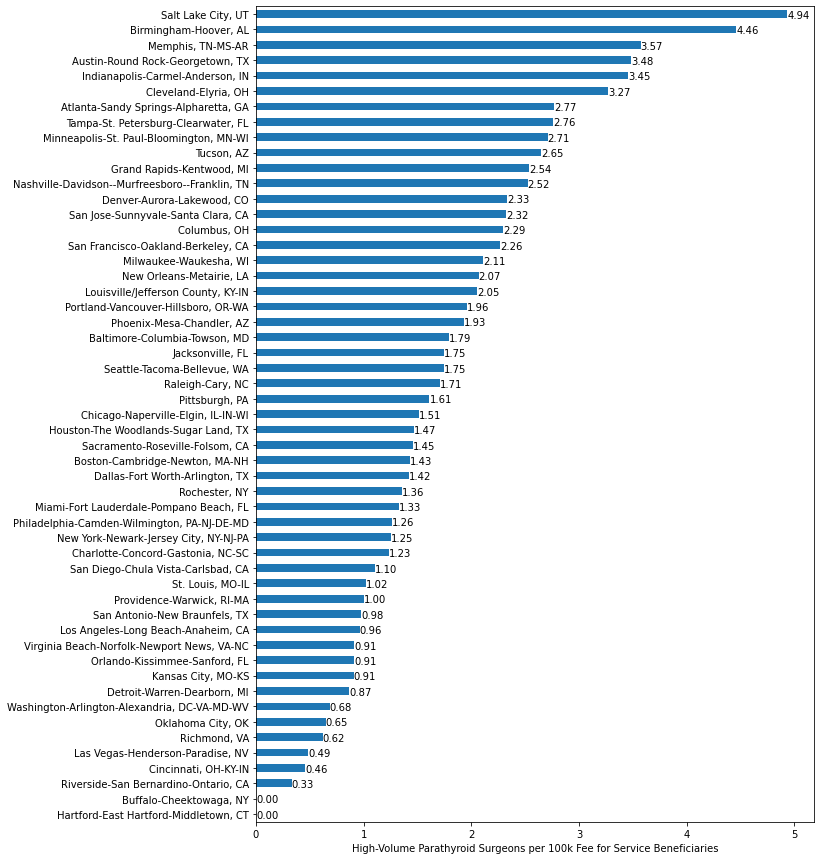

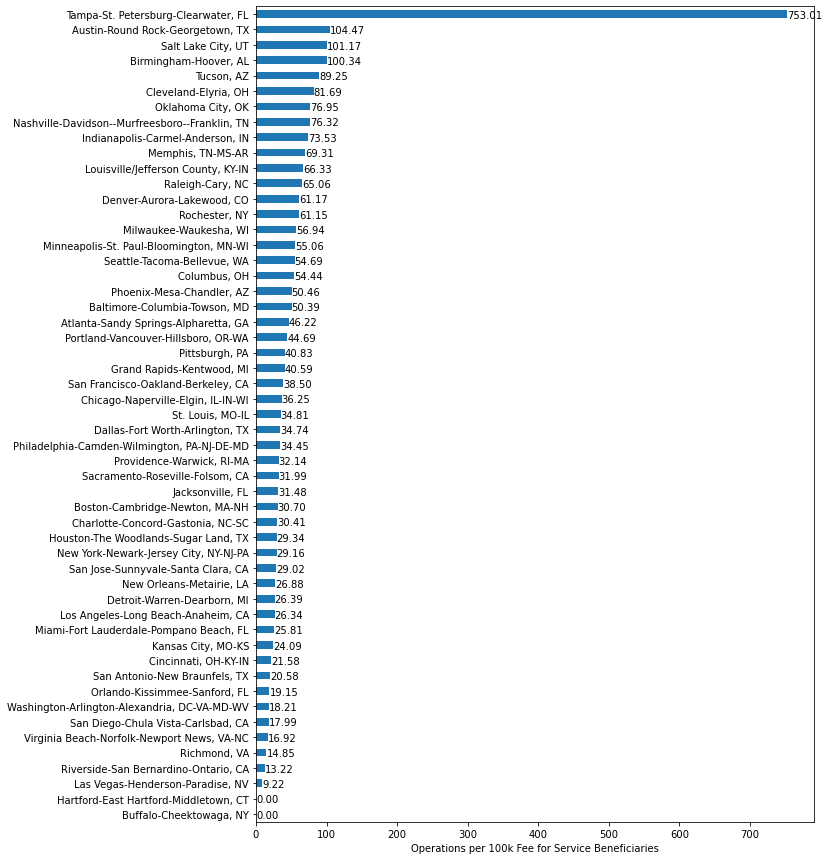

In [18]:
#Create bar graphs
plt.rcParams["figure.figsize"]=[10, 15]
claims_barchart("HVS per 100k FFS")
claims_barchart("PTX per 100k FFS")